In [4]:
import pandas as pd
import numpy as np

#input Dataset
train_data=pd.read_csv('dtrain.csv')
test_data=pd.read_csv('dtest.csv')
train_data

,id,Umur,Kelas Pekerjaan 2,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,9,242912,3,9,1,7,1,0,0,35,0
1,1,49,9,140782,3,6,3,14,1,0,0,40,0
2,2,44,9,120057,4,12,2,14,2,61404000,0,45,1
3,3,24,9,194630,5,13,1,13,2,0,0,35,0
4,4,33,9,219619,6,14,2,13,2,210336000,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,4,148169,3,9,2,8,2,0,0,40,0
35990,35990,69,5,264722,4,12,2,6,2,0,0,40,1
35991,35991,24,4,31606,5,13,2,13,1,0,0,20,1
35992,35992,47,9,197836,3,9,2,6,2,0,0,45,0


In [5]:
test_data

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,6,99761,5,11,3,11,1,0,0,40
1,35995,28,9,202206,3,9,2,9,2,0,0,50
2,35996,34,8,199934,5,10,2,11,2,0,0,40
3,35997,51,9,373448,5,10,2,14,2,0,28028000,40
4,35998,20,1,144685,5,10,1,1,1,0,22428000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,45588,58,7,159021,2,5,2,12,2,0,0,40
9595,45589,45,4,144086,3,7,2,8,2,0,0,50
9596,45590,20,9,238685,5,10,1,7,1,0,0,32
9597,45591,41,6,249039,3,9,3,11,1,0,0,40


In [2]:
#Preparing data for training
X_test1 = test_data
#Preparing data for training
X = train_data.iloc[:, 1:12].values
y = train_data.iloc[:, 12].values

In [3]:
X

array([[      21,        9,   242912, ...,        0,        0,       35],
       [      49,        9,   140782, ...,        0,        0,       40],
       [      44,        9,   120057, ..., 61404000,        0,       45],
       ...,
       [      24,        4,    31606, ...,        0,        0,       20],
       [      47,        9,   197836, ...,        0,        0,       45],
       [      45,        9,   243743, ...,        0,        0,       60]],
      dtype=int64)

In [4]:
y

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

array([[      24,        9,   128487, ...,        0,        0,       40],
       [      30,        9,    38848, ...,        0,        0,       40],
       [      43,        8,   111483, ..., 43442000,        0,       40],
       ...,
       [      35,        9,   166193, ...,        0,        0,       40],
       [      23,        9,   195016, ...,        0,        0,       35],
       [      36,        9,   173804, ...,        0,        0,       40]],
      dtype=int64)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

randomforest_clas = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest_clas.fit(X_train, y_train)
y_pred = randomforest_clas.predict(X_test)

In [8]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[5087  380]
 [ 668 1064]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5467
           1       0.74      0.61      0.67      1732

    accuracy                           0.85      7199
   macro avg       0.81      0.77      0.79      7199
weighted avg       0.85      0.85      0.85      7199

0.854424225586887


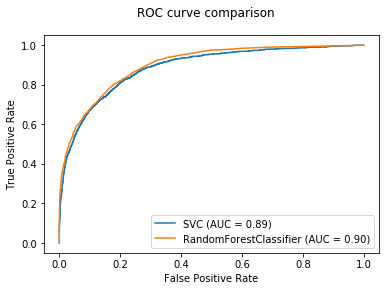

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

roc_auc_score(y_test, y_pred)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [16]:
#Final_predict
X_test_result=test_data.iloc[:, 1:12].values
X_test_result

y_predrfc=rfc.predict(X_test_result)
result_submissionrfc = pd.DataFrame({'id':test_data['id'],'Gaji':y_predrfc})
result_submissionrfc.to_csv('pendapatan_GajiRFC.csv', index=False)

In [45]:
#Final_predict
y_pred_result = randomforest_clas.predict(X_test_result)

In [46]:
y_pred_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
#Change to csv

result_submission = pd.DataFrame({'id':test_data['id'],'Gaji':y_pred_result})
result_submission.to_csv('pendapatan_Gaji.csv', index=False)

In [47]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_predsvc = svc.predict(X_test)

In [48]:
print(confusion_matrix(y_test,y_predsvc))
print(classification_report(y_test,y_predsvc))
print(accuracy_score(y_test, y_predsvc))

[[5159  308]
 [ 765  967]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      5467
           1       0.76      0.56      0.64      1732

    accuracy                           0.85      7199
   macro avg       0.81      0.75      0.77      7199
weighted avg       0.84      0.85      0.84      7199

0.8509515210445895


In [49]:
roc_auc_score(y_test, y_predsvc)

0.7509880297954006

In [50]:
y_pred_resultsvc =svc.predict(X_test_result)

In [51]:
#Change to csv

result_submission2 = pd.DataFrame({'id':test_data['id'],'Gaji':y_pred_resultsvc})
result_submission2.to_csv('pendapatan_GajiSVC.csv', index=False)

In [24]:
#Model Lain (Model Terbaik)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42, dual=False)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000)
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8188687631959106

In [31]:
ypredclf=clf.predict(X_test)
roc_auc_score(y_test, ypredclf)

0.8061613392727353

In [26]:
y_predclf=clf.predict(X_test_result)
y_predclf

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
#Change to csv

result_submissionclf = pd.DataFrame({'id':test_data['id'],'Gaji':y_predclf})
result_submissionclf.to_csv('pendapatan_GajiCLF.csv', index=False)